Chapter01 인공지능/딥러닝/텐서플로 설치

01 인공지능과 딥러닝

02 텐서플로 설치

## Deep Learning


> Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. https://en.wikipedia.org/wiki/Deep_learning

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/AI-ML-DL.svg/800px-AI-ML-DL.svg.png" width=400>

## AI History

http://beamlab.org/images/deep_learning_101/nn_timeline.jpg

## DL Tasks & Models

| Application      | Model | Tensorflow Tutorial | Project |
| ----------- | ----------- | ----------- | ------------ |
| Image Classification| Alexnet, VGG, Resnet50, ViT | https://www.tensorflow.org/tutorials/keras/classification <br> https://keras.io/api/applications/| 병 분류 |
| Image Generation      | GAN, DCGAN, Stable Diffusion <a href="https://www.midjourney.com"> Midjourney </a>| https://www.tensorflow.org/tutorials/generative/dcgan  <br> https://www.tensorflow.org/tutorials/generative/generate_images_with_stable_diffusion |
| Image Segmentation   | <a href="https://segment-anything.com/" >SAM</a>        | https://www.tensorflow.org/tutorials/images/segmentation |
| Object Detection   | <a href="https://github.com/ultralytics/ultralytics"> YOLOv8 </a>       | https://www.tensorflow.org/hub/tutorials/tf2_object_detection |  병 검출 |
| Text Classification   | <a href="https://github.com/google-research/bert"> BERT </a>,  <a href="https://github.com/snunlp/KR-BERT"> KR_BERT </a>     | https://www.tensorflow.org/text/tutorials/classify_text_with_bert <br> https://keras.io/api/keras_nlp/models/ |  카테고리 분류, 뉴스분석 |
| Text Generation   | <a href="https://openai.com/blog/chatgpt">ChatGPT</a>, GPT4, <a href="https://bard.google.com">BARD</a>, BING  | https://keras.io/examples/generative/text_generation_with_miniature_gpt/ | 코드 생성 |
| Structured Data   |   <a href="https://github.com/jsyoon0823/VIME" >VIME</a>      | https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers | 카테고리 분류, 리드타임 |
| Timeseries   |     ECG    | https://www.tensorflow.org/tutorials/generative/autoencoder | 위험운전 (비지도)
| Timeseries   | <a href="https://github.com/thuml/Autoformer">Autoformer</a>  | https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers <br> https://www.tensorflow.org/tutorials/structured_data/time_series | AIS (위,경도), 대기시간, 행동인식, 코인가격 |

## Google Trend (June, 2023)

<img src="https://drive.google.com/uc?id=1GOEpTRnXlqpaySxndNmtUAwFGGrSVyrr" width="400"/>

<img src="https://drive.google.com/uc?id=12X6e-PosJk5qjVIAAMzHXcIG8EDhstOF" width="400"/>





## Online References (필요한 부분 참고)

https://wikidocs.net/book/8878

https://wikidocs.net/book/2155







# Install TensorFlow 2

https://www.tensorflow.org/install

In [ ]:
!python -c 'import tensorflow as tf; print(tf.__version__)'

2023-06-24 13:22:26.381621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 13:22:29.255036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2.12.0


In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[]

## TensorFlow with GPU access is supported for WSL2 on Windows 10 19044 or higher.

https://www.tensorflow.org/install/pip#windows-wsl2

## Local Runtime on Colab

https://research.google.com/colaboratory/local-runtimes.html

Install Jupyter on your local machine.

In [ ]:
# http://jupyter.org/install
# !pip install jupyterlab
# !pip install notebook

New notebook servers are started normally, though you will need to set a flag to explicitly trust WebSocket connections from the Colab frontend.

In [ ]:
!jupyter notebook \
    --NotebookApp.allow_origin='https://colab.research.google.com' \
    --port=8888 \
    --NotebookApp.port_retries=0

Once the server has started, it will print a message with the initial backend URL used for authentication. Make a copy of this URL as you'll need to provide this for step 2 below.

In [ ]:
# In Colab, click the "Connect" button and select "Connect to local runtime...".
# Enter the URL from the previous step in the dialog that appears and click the "Connect" button.
# After this, you should now be connected to your local runtime.

## Model Development Workflow


1. Understanding Datasets

2. Data Preprocessing

3. Exploratory Data Analysis (EDA)

4. Building a Baseline Model

5. Model Performance Evaluation

6. Improving Model Performance


* Machine Learning Checklist

https://docs.google.com/spreadsheets/d/1kVygnwbR_YUpNFgw-6mZQuPn8ILY2m3vl32BOu7gQsc/edit#gid=39315817

* Deep Learning Checklist

https://docs.google.com/spreadsheets/d/1kVygnwbR_YUpNFgw-6mZQuPn8ILY2m3vl32BOu7gQsc/edit#gid=1051001003


[참고]

1. 신백균, 머신러닝/딥러닝 문제해결 전략, 2022

In [7]:
import tensorflow as tf
from tensorflow import keras

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 모델 구축
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

# 모델 컴파일
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# 모델 훈련
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2591 - accuracy: 0.9254 - val_loss: 0.1350 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.1166 - val_accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.0855 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.0810 - val_accuracy: 0.9739
Epoch 5/5
313/313 [==============================] - 0s 748us/step - loss: 0.0736 - accuracy: 0.9774
Test accuracy: 0.977400004863739


2.12.0


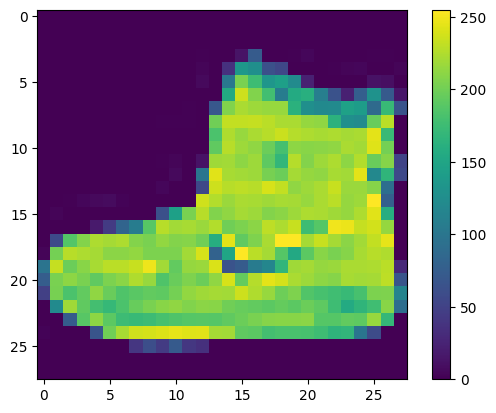

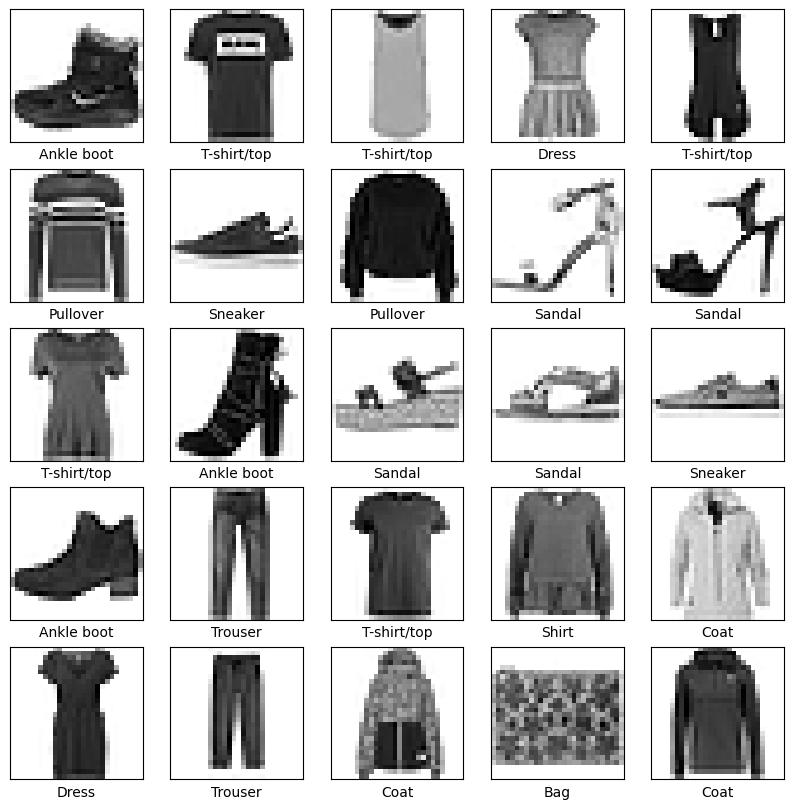

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3802 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3401 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3148 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2579 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [10]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

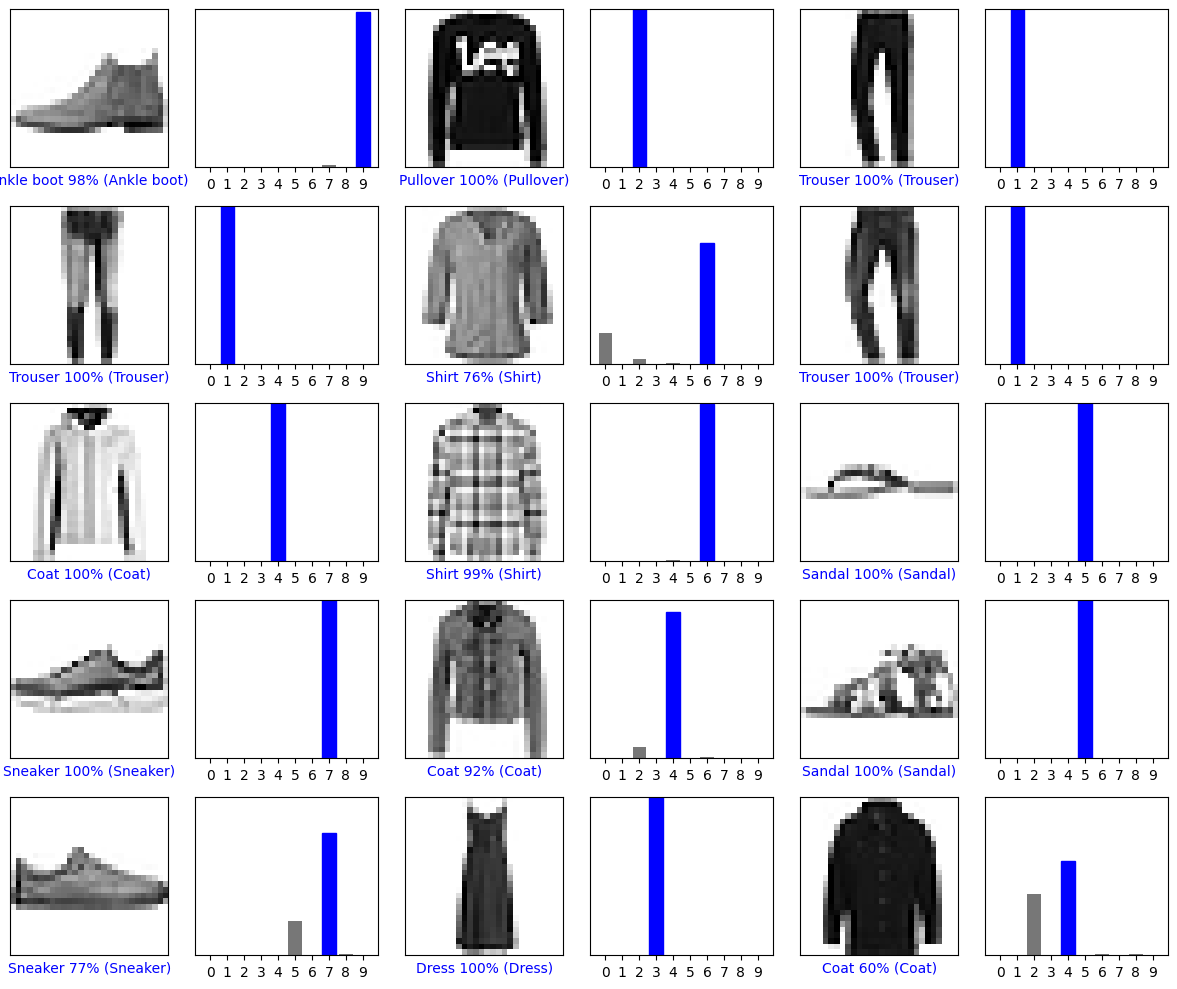

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()